## Analysis of women's clothes reviews

Exploratory data analysis of women's clothes reviews.

The dataset comes from https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.

Variables:
- Clothing ID (numeric): specific piece being reviewed;
- Age (numeric): reviewers age;
- Title (text): title of the review;
- Review Text (text): review text;
- Rating (numeric): product score granted by the customer from 1 Worst, to 5 Best;
- Recommended IND (numeric): customer recommends the product where 1 is recommended, 0 is not recommended;
- Positive Feedback Count (numeric): number of other customers who found this review positive;
- Division Name (text): name of the product high level division;
- Department Name (text): name of the product department name;
- Class Name (text): name of the product class name.


### Importing packages and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import trim_mean

In [2]:
df = pd.read_csv('C:\Python Scripts\Datasets\Womens Clothing Reviews.csv', header=0,index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


**First observations**:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
df.shape

(23486, 10)

In [5]:
#type of variables
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [6]:
df['Review Text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

### EDA:  Exploratory data analysis

In [7]:
df_text = df[['Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Age', 'Class Name', 'Department Name']]
df_text.head()

,Review Text,Rating,Recommended IND,Positive Feedback Count,Age,Class Name,Department Name
0,Absolutely wonderful - silky and sexy and comf...,4,1,0,33,Intimates,Intimate
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses
2,I had such high hopes for this dress and reall...,3,0,0,60,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops


In [8]:
df_text = df_text.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
df_text.head()

,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name
0,Absolutely wonderful - silky and sexy and comf...,4,1,0,33,Intimates,Intimate
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses
2,I had such high hopes for this dress and reall...,3,0,0,60,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops


**Missing values:**

In [9]:
df_text.isnull().sum()

Review                     845
Rating                       0
Recommended                  0
Positive Feedback Count      0
Age                          0
Class Name                  14
Department Name             14
dtype: int64

Delate missing values:

In [10]:
df_text.dropna(subset=['Review'], inplace=True)

In [11]:
df_text.isnull().sum()

Review                      0
Rating                      0
Recommended                 0
Positive Feedback Count     0
Age                         0
Class Name                 13
Department Name            13
dtype: int64

In [12]:
df_text.shape

(22641, 7)

**Analysis of individual variables**

Unique counts of records for each column:

In [13]:
df_text.nunique()

Review                     22634
Rating                         5
Recommended                    2
Positive Feedback Count       82
Age                           77
Class Name                    20
Department Name                6
dtype: int64

Unique values for individual variables:

In [14]:
df_text['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [15]:
df_text['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [16]:
df_text['Rating'].value_counts()

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

#### Plots of an individual variables:

Text(0.5, 1.0, 'Distribution of Rating')

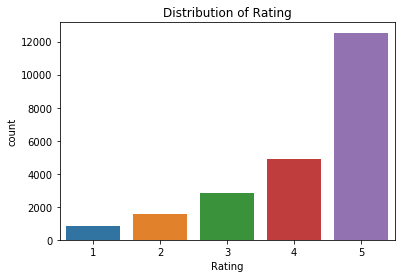

In [17]:
sns.countplot(x='Rating',data=df_text)
plt.title("Distribution of Rating")

The figure shows that the most reviews are positive (rating 5) than negative.

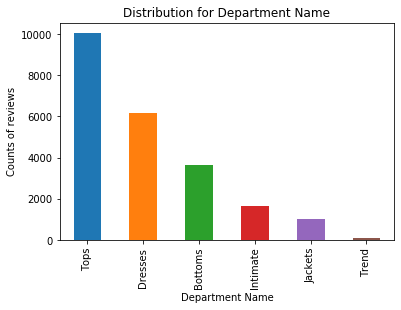

In [18]:
df_text['Department Name'].value_counts().plot(kind='bar', title='Distribution for Department Name')
plt.xlabel("Department Name")
plt.ylabel("Counts of reviews")
plt.show()

The figure shows that the most reviews products are tops and dresses. 

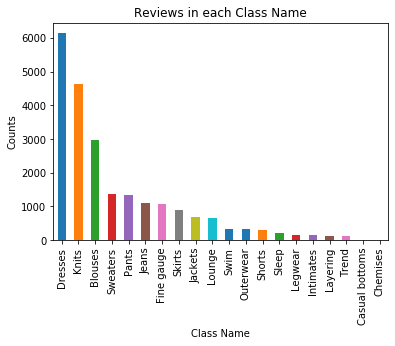

In [19]:
df_text['Class Name'].value_counts().plot(kind='bar', title='Reviews in each Class Name')
plt.xlabel("Class Name")
plt.ylabel("Counts")
plt.show()

Checking what is the customers' age distribution.

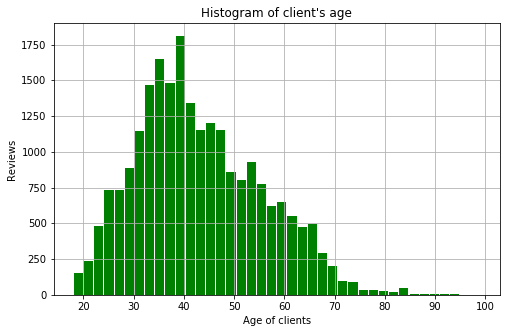

In [20]:
df_text["Age"].hist(bins = 40, figsize=(8,5), rwidth=0.9, color="green")
plt.xlabel("Age of clients")
plt.ylabel("Reviews")
plt.title("Histogram of client's age");


The above histogram shows that aged between 25-55 are most reviewing age group.

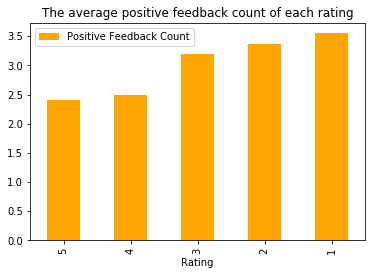

In [21]:
df_text.groupby('Rating')[['Positive Feedback Count']].mean().sort_values('Rating', ascending=False).plot(kind='bar', 
                                                color=['orange'], title='The average positive feedback count of each rating');

In the figure one can see that most products are recommended.

**Checking what is the reviews length distribution:**

In [22]:
df_text['Review_length'] = df_text['Review'].apply(len)
df_text.head()

,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name,Review_length
0,Absolutely wonderful - silky and sexy and comf...,4,1,0,33,Intimates,Intimate,53
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses,303
2,I had such high hopes for this dress and reall...,3,0,0,60,Dresses,Dresses,500
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms,124
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops,192


Text(0.5, 1.0, 'Histogram of review length')

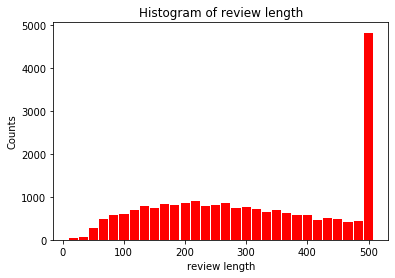

In [23]:
df_text["Review_length"].plot(bins=30, rwidth=0.9, kind='hist', color="red")
plt.xlabel("review length")
plt.ylabel("Counts")
plt.title("Histogram of review length")

Histogram of reviews length of each rating:

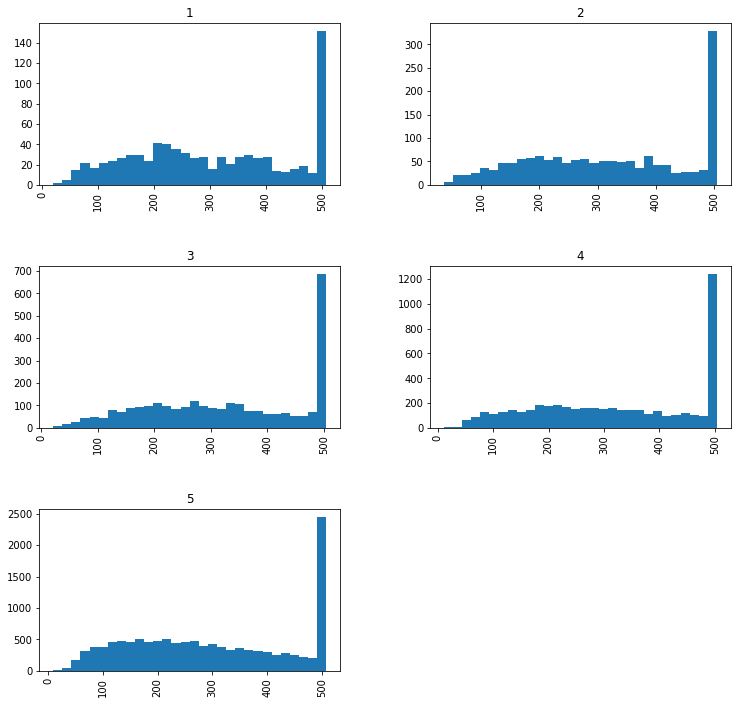

In [24]:
df_text.hist(column='Review_length', by='Rating', bins=30,figsize=(12,12));

The figures shows that the most reviews length are more than 500 signs.

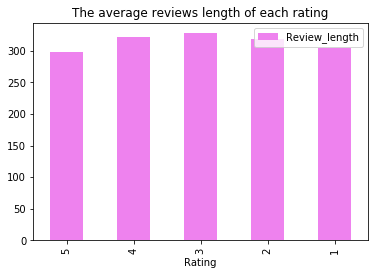

In [25]:
df_text.groupby('Rating')[['Review_length']].mean().sort_values('Rating', ascending=False).plot(kind='bar', 
                                                color=['violet'], title='The average reviews length of each rating');

**Selecting specific data from columns:**

In [26]:
df_text.loc[df_text['Rating'] == 1].head()

,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name,Review_length
61,"3 tags sewn in, 2 small (about 1'' long) and 1...",1,0,0,36,Intimates,Intimate,484
85,"I was really hoping to like this, but it did n...",1,0,2,58,Knits,Tops,499
96,I usually wear a medium and bought a small. it...,1,0,0,44,Blouses,Tops,238
97,I was very excited to order this top in red xs...,1,0,0,44,Knits,Tops,157
110,This is so thin and poor quality. especially f...,1,0,11,44,Knits,Tops,180


In [27]:
df_text.loc[df_text['Rating'] == 5].head()

,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name,Review_length
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses,303
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms,124
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops,192
6,I aded this in my basket at hte last mintue to...,5,1,1,39,Knits,Tops,496
8,I love this dress. i usually get an xs but it ...,5,1,0,24,Dresses,Dresses,166


More than 5 Positive Feedback Count:

In [28]:
df_text[df_text['Positive Feedback Count'] > 5].head()

,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name,Review_length
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops,192
10,Dress runs small esp where the zipper area run...,3,0,14,53,Dresses,Dresses,336
21,"I'm upset because for the price of the dress, ...",4,1,14,55,Dresses,Dresses,500
22,"First of all, this is not pullover styling. th...",2,0,7,31,Dresses,Dresses,437
31,I never would have given these pants a second ...,5,1,7,46,Pants,Bottoms,344


Rating greater than 4.0 and customers' age greater than 30:

In [29]:
df_text[(df_text['Rating'] > 4.0) & (df_text['Age'] < 30)].head(10)

,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name,Review_length
8,I love this dress. i usually get an xs but it ...,5,1,0,24,Dresses,Dresses,166
29,This sweater is so comfy and classic - it bala...,5,1,0,28,Sweaters,Tops,445
32,These pants are even better in person. the onl...,5,1,0,21,Pants,Bottoms,93
42,This poncho is so cute i love the plaid check ...,5,1,0,23,Fine gauge,Tops,239
62,I recently got this on sale after looking at i...,5,1,0,28,Knits,Tops,201
72,I have a short torso and this works well for m...,5,1,4,27,Blouses,Tops,500
91,This top is so much prettier in real life than...,5,1,5,29,Blouses,Tops,401
108,"The shirt is exactly as it is pictured, i have...",5,1,3,23,Blouses,Tops,316
122,This is a great pull over dress that can easil...,5,1,0,29,Dresses,Dresses,293
123,"After reading the previous reviews, i ordered ...",5,1,0,24,Blouses,Tops,189


How many products have rating above 4?

In [30]:
df_text['Class Name'].where(df['Rating'] > 4).count()

12527

How many products have rating below 3?

In [31]:
df_text['Class Name'].where(df['Rating'] < 3).count()

2370

Number of reviewes products according to the rating, max, minimum, mean and sum:

In [32]:
df_text.groupby('Class Name')['Rating'].agg(['max', 'min', 'mean', 'sum'])

,max,min,mean,sum
Class Name,,,,
Blouses,5,1,4.142809,12358
Casual bottoms,4,4,4.000000,4
Chemises,4,4,4.000000,4
Dresses,5,1,4.138812,25433
Fine gauge,5,1,4.237960,4488
Intimates,5,1,4.278912,629
Jackets,5,1,4.288433,2929
Jeans,5,1,4.347826,4800
Knits,5,1,4.145698,19178


Sum of positive feedback count according to the rating: 

In [33]:
df_text.groupby('Rating')['Positive Feedback Count'].count().sort_values(ascending=False)

Rating
5    12540
4     4908
3     2823
2     1549
1      821
Name: Positive Feedback Count, dtype: int64

Number of positive feedback count according to the rating; max , minimum, mean and sum:

In [34]:
df_text.groupby('Rating')['Positive Feedback Count'].agg(['max', 'min', 'mean', 'sum'])

,max,min,mean,sum
Rating,,,,
1,108,0,3.548112,2913
2,65,0,3.360232,5205
3,122,0,3.198725,9030
4,95,0,2.488386,12213
5,117,0,2.408134,30198


Maximum and minimum customers age according to the rating:

In [35]:
df_text.groupby('Rating')['Age'].agg(['max', 'min', 'mean'])

,max,min,mean
Rating,,,
1,94,19,43.710110
2,91,19,42.609425
3,91,19,42.163301
4,99,18,43.012225
5,99,18,43.691547


**Overview of recommended variable: positive and negative reviews**

In [36]:
df_text['Recommended'].unique()

array([1, 0], dtype=int64)

The counts of unique values:

In [37]:
df_text['Recommended'].value_counts()

1    18540
0     4101
Name: Recommended, dtype: int64

In [38]:
df_text.groupby(['Rating', 'Recommended'])['Recommended'].count()

Rating  Recommended
1       0                806
        1                 15
2       0               1455
        1                 94
3       0               1653
        1               1170
4       0                164
        1               4744
5       0                 23
        1              12517
Name: Recommended, dtype: int64

The average of reviews length in recommended variable:

In [40]:
df_text.groupby('Recommended')[['Review_length']].mean()

,Review_length
Recommended,
0,318.334065
1,306.554207


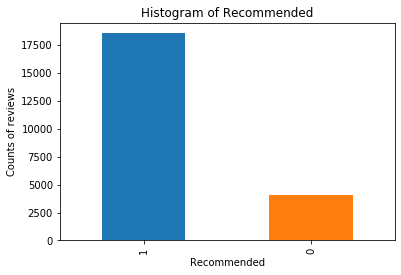

In [39]:
df_text["Recommended"].value_counts().plot(kind='bar', title='Distribution for Recommended')
plt.xlabel("Recommended")
plt.ylabel("Counts of reviews")
plt.title("Histogram of Recommended");

The target value is imbalanced, there are more positive reviews than negative. 

### Summary statistic

The mean of positive feedback count and customers age:

In [41]:
df_text['Positive Feedback Count'].mean()

2.630581688087982

In [42]:
df_text['Age'].mean()

43.28037630846694

**Trimmed mean**:
mean after discarding top and bottom 10 % values eliminating outliers.

Trimmed mean for positive feedback count and customers age:

In [43]:
positive_TM = trim_mean(df_text['Positive Feedback Count'], 0.1) 
print ("Positive feedback trimmed mean: ", positive_TM) 
  
age_TM = trim_mean(df_text.Age, 0.1) 
print ("\nCustomers age trimmed mean: ", age_TM) 

Positive feedback trimmed mean:  1.365317727598962

Customers age trimmed mean:  42.63114889858113


**Weighted Mean**

Positive Feedback Count rate is weighed as per the customers age:

In [44]:
positive_WM = np.average(df_text['Positive Feedback Count'], weights = df_text.Age) 
print ("Weighted Positive feedback Mean: ", positive_WM) 


Weighted Positive feedback Mean:  2.697900115418645


**Median**

Median for positive feedback count and customers age:

In [45]:
Positive_Feedback_median = df_text['Positive Feedback Count'].median() 
print ("Positive feedback count median : ", Positive_Feedback_median) 
  
Age_median = df_text.Age.median() 
print ("\nCustomers age median : ", Age_median) 

Positive feedback count median :  1.0

Customers age median :  41.0


**Descriptive Statistics for numeric columns:**

In [46]:
df_text.describe()

,Rating,Recommended,Positive Feedback Count,Age,Review_length
count,22641.000000,22641.000000,22641.000000,22641.000000,22641.000000
mean,4.183561,0.818868,2.630582,43.280376,308.687911
std,1.115762,0.385136,5.786164,12.326980,143.940048
min,1.000000,0.000000,0.000000,18.000000,9.000000
25%,4.000000,1.000000,0.000000,34.000000,186.000000
50%,5.000000,1.000000,1.000000,41.000000,301.000000
75%,5.000000,1.000000,3.000000,52.000000,459.000000
max,5.000000,1.000000,122.000000,99.000000,508.000000


**Skewed distribution:**

In [47]:
df_text.skew()

Rating                    -1.288056
Recommended               -1.656022
Positive Feedback Count    6.380592
Age                        0.515729
Review_length             -0.042663
dtype: float64

For the Age variable we have symmetric distribution, for Rating and Recommended left skewed distribution (average smaller than median) and Positive Fedback Count is a right-skewed distribution (average grather than median).

**Correlation:**

In [48]:
corr = df_text.corr()
corr

,Rating,Recommended,Positive Feedback Count,Age,Review_length
Rating,1.000000,0.792568,-0.060984,0.029962,-0.056199
Recommended,0.792568,1.000000,-0.065923,0.034208,-0.031519
Positive Feedback Count,-0.060984,-0.065923,1.000000,0.040850,0.191195
Age,0.029962,0.034208,0.040850,1.000000,0.014931
Review_length,-0.056199,-0.031519,0.191195,0.014931,1.000000


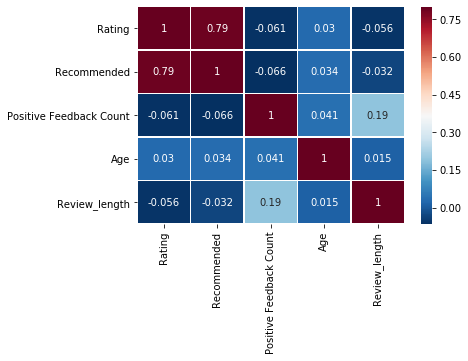

In [49]:
ax = sns.heatmap(corr, annot=True, linewidth=0.5, cmap='RdBu_r', vmax=.8)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

plt.show()

In the above figure we can see that the variables are strongly correlated with themselves and strong relationship found between Rating and Recommended variables.

#### Outlier Identification

In [57]:
data = df_text[['Rating', 'Recommended', 'Positive Feedback Count', 'Age', 'Review_length']]
data.head()

,Rating,Recommended,Positive Feedback Count,Age,Review_length
0,4,1,0,33,53
1,5,1,4,34,303
2,3,0,0,60,500
3,5,1,0,50,124
4,5,1,6,47,192


##### Box plot for outlier detection

The box plot is a  way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It is frequently used to identify data distribution and detect outliers. 

Below the box plots of the variables Age, Positive Feedback Count and Rating:

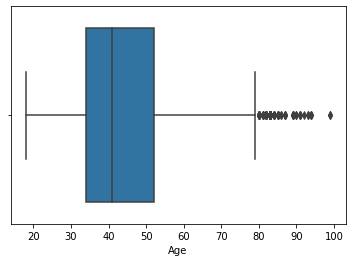

In [77]:
sns.boxplot(x=data['Age']);

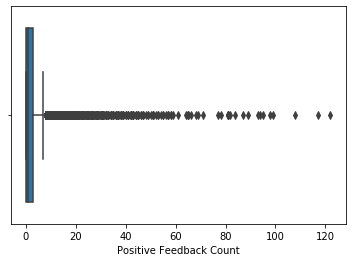

In [78]:
sns.boxplot(x=data['Positive Feedback Count']);

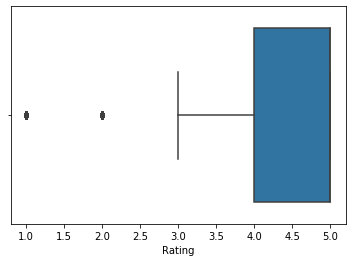

In [79]:
sns.boxplot(x=data['Rating']);

##### Identifying Outliers with Interquartile Range(IQR):

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. One can describe it by the formula IQR = Q3 − Q1. 

In [69]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = q3-q1
print(IQR)

Rating                       1.0
Recommended                  0.0
Positive Feedback Count      3.0
Age                         18.0
Review_length              273.0
dtype: float64


We can determine outliers based on IQR results. The 'False' value means that the values are correct, while value is 'True' means the presence of an outlier:

In [70]:
outliers_filter = (data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))
outliers_filter.head(20)

,Rating,Recommended,Positive Feedback Count,Age,Review_length
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,True,True,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [75]:
no_outlier_filter = ~(outliers_filter).any(axis=1)
no_outlier_filter

0         True
1         True
2        False
3         True
4         True
5        False
6         True
7         True
8         True
9         True
10       False
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21       False
22       False
23        True
24        True
25       False
26       False
27        True
28        True
29        True
         ...  
23454     True
23455     True
23456     True
23457     True
23458     True
23459     True
23460    False
23461     True
23462     True
23463     True
23464     True
23465     True
23466     True
23467    False
23468     True
23469     True
23471     True
23472     True
23473     True
23474     True
23475     True
23476     True
23477     True
23478    False
23479     True
23481     True
23482     True
23483    False
23484     True
23485    False
Length: 22641, dtype: bool

In [76]:
no_outlier_filter.value_counts()


True     16747
False     5894
dtype: int64

##### IQR Score

In this method we used the IQR scores calculated earlier to remove outliers. The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

The shape of this data comes 16747 observations of 5 variables. In this case a lot of records will be deleted by the using the IQR method. 

In [74]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_out.shape)

(16747, 5)


### Conclusion

We performed exploratory data analysis of women's clothes reviews. We analyzed and plots individual variables. We also counted the summary statistics such as mean, trimmed mean, weighted mean and median. We have determined skewed distribution and correlation as well. At the end the outliers identification have beed established.